### 0. Install and Import Dependencies

In [114]:
!pip install -q tensorflow==1.15.0 stable-baselines3 gym-anytrading gym

In [116]:
# Import libraries
#gym stuff
import gym
import gym_anytrading

# stable baselines -reinforcement learning stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Bring in Marketwatch GME (Game Stop Corporation) Data

In [117]:
#https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [118]:
df = pd.read_csv("/content/drive/MyDrive/Data Science WorkSpace/Deep Learning Projects/Reinforcement Learning GME Trading/gmedata.csv") 

In [119]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [120]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [121]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [122]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [123]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


In [124]:
env.prices

array([137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,  91.71,
        44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,  51.1 ,
        51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  , 225.  ,
       325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,  39.12,
        39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,  18.08,
        18.36,  17.37,  17.25,  18.84,  19.26,  19.38,  20.99,  20.15,
        20.57,  19.46,  15.53,  15.63,  14.83,  13.85,  13.85,  12.72,
        13.31,  14.12,  13.66,  16.94,  16.35,  16.9 ,  16.12,  16.58,
        15.8 ,  16.56,  16.08,  14.75,  13.67,  13.9 ,  12.71,  12.46,
        11.57,  11.63,  12.06,  11.01,  11.13,  11.75,  11.1 ,  11.49,
        11.86,  11.45,  10.91,  11.57,  10.75,  10.47,  11.73,  11.82,
        12.69,  13.45,  15.  ,  14.91,  14.1 ,  13.86,  13.91])

In [125]:
env.signal_features

array([[ 1.3774e+02,  0.0000e+00],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,  1.3500e+02],
       [ 3.2500e+02,  1.0000e+02],
       [ 1.9360e+02, -1.3140e+02],
       [ 3.4751e+02,  1.5391e+02],
       [ 1.4798e+02, -1.9953e+02],
       [ 7.6790e+01,

### 2. Build Environment

In [126]:
env.action_space

Discrete(2)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:196: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed a

info {'total_reward': -358.29, 'total_profit': 0.034323213677883505, 'position': 1}


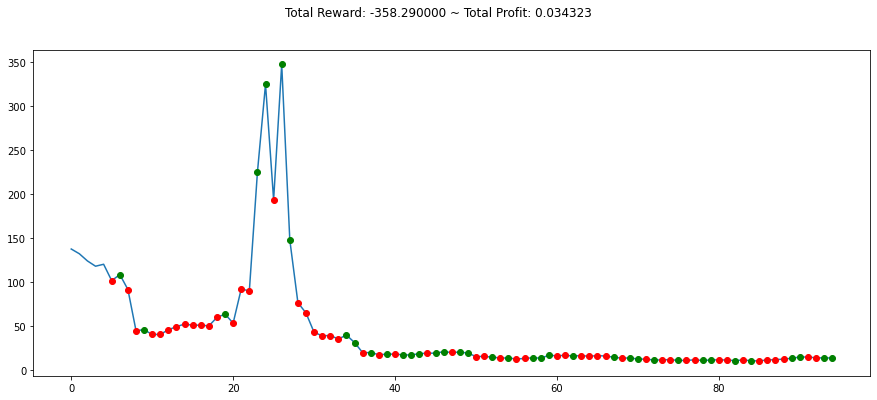

In [127]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

### 3. Build Environment and Train

In [128]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


In [129]:
model = A2C('MlpPolicy', env, verbose=1) # Multi Layer Perceptron LSTM Policy
model.learn(total_timesteps=100000)

Using cpu device


/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:196: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed a

-------------------------------------
| time/                 |           |
|    fps                | 596       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.0868   |
|    explained_variance | -1.32e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 138       |
|    value_loss         | 2.89e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 645      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0167  |
|    explained_variance | 0.0348   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 5.8e-05  |
|    value_loss         

### 4. Evaluation

In [136]:
env = gym.make('stocks-v0', df=df, frame_bound=(80, 100), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 1.2310912398921832, 'position': 1}


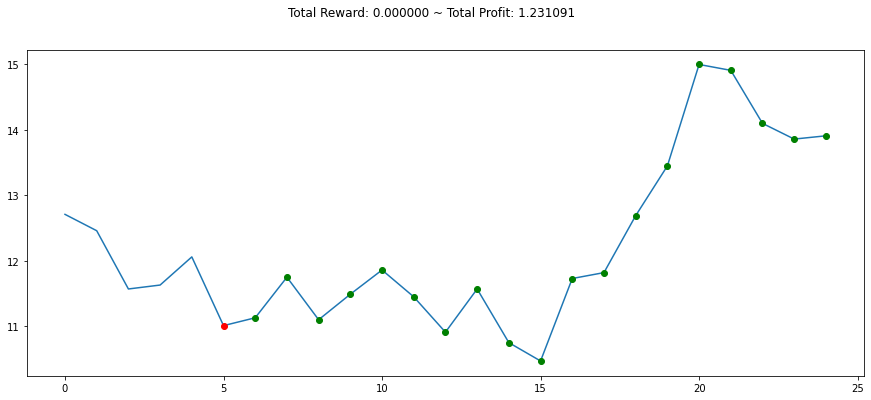

In [138]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()